# procesando un chingo de la idioma natural

In [401]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA, TruncatedSVD
# NLP Tools
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy as sp
from textblob import TextBlob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

np.random.seed(42)

### Load Data

In [402]:
bb = pd.read_csv('./datasets/jun20_bb_posts.csv', )
cnn = pd.read_csv('./datasets/jun20_cnn_posts.csv')
fox = pd.read_csv('./datasets/jun20_fox_posts.csv')
fox2 = pd.read_csv('./datasets/fox_posts_jun26.csv')
fox3 = pd.read_csv('./datasets/fox_posts_jun29.csv')
nr = pd.read_csv('./datasets/jun20_nr_posts.csv')
nr2 = pd.read_csv('./datasets/jun29_nr_posts.csv')
# nyt = pd.read_csv('./datasets/jun20_nyt_posts.csv')
vice = pd.read_csv('./datasets/jun20_vice_posts.csv')
dem = pd.read_csv('./datasets/jun21_demnow_posts.csv')
dem2 = pd.read_csv('./datasets/jun22_demnow_posts.csv')
dem3 = pd.read_csv('./datasets/jun23_demnow_posts.csv')
dem4 = pd.read_csv('./datasets/jun24_demnow_posts.csv')
dem5 = pd.read_csv('./datasets/jun25_demnow_posts.csv')
dem6 = pd.read_csv('./datasets/jun26_demnow_posts.csv')
dem7 = pd.read_csv('./datasets/jun29_demnow_posts.csv')
inwa = pd.read_csv('./datasets/june20infowars.csv')
inwa2 = pd.read_csv('./datasets/june21infowars.csv')
inwa3 = pd.read_csv('./datasets/june22infowars.csv')
inwa4 = pd.read_csv('./datasets/june23infowars.csv')
inwa5 = pd.read_csv('./datasets/june24infowars.csv')
inwa6 = pd.read_csv('./datasets/june25infowars.csv')
inwa7 = pd.read_csv('./datasets/june26infowars.csv')
inwa8 = pd.read_csv('./datasets/june29infowars.csv')
msnbc = pd.read_csv('./datasets/jun26_msnbc_posts.csv')
huff = pd.read_csv('./datasets/jun_24_huff_posts.csv')

In [403]:
bb['yes_right'] = 1
cnn['yes_right'] = 0
fox['yes_right'] = 1
fox2['yes_right'] = 1
fox3['yes_right'] = 1
nr['yes_right'] = 1
nr2['yes_right'] = 1
# nyt['yes_right'] = 0
vice['yes_right'] = 0
dem['yes_right'] = 0
dem2['yes_right'] = 0
dem3['yes_right'] = 0
dem4['yes_right'] = 0
dem5['yes_right'] = 0
dem6['yes_right'] = 0
dem7['yes_right'] = 0
inwa['yes_right'] = 1
inwa2['yes_right'] = 1
inwa3['yes_right'] = 1
inwa4['yes_right'] = 1
inwa5['yes_right'] = 1
inwa6['yes_right'] = 1
inwa7['yes_right'] = 1
inwa8['yes_right'] = 1
msnbc['yes_right'] = 0
huff['yes_right'] = 0

In [404]:
text = pd.concat(
    [bb, cnn, fox, fox2, fox3, nr, nr2, vice, dem, dem2, dem3, dem4, dem5, dem6, dem7, inwa,
     inwa2, inwa3, inwa4, inwa5, inwa6, inwa7, inwa8, msnbc, huff])

### Clean Data

In [405]:
text.drop(['Unnamed: 0', 'category', 'urlToImage'], axis=1, inplace=True)

In [406]:
text.isna().sum()

author         9466
description      69
publishedAt       0
source            0
title             1
url               0
yes_right         0
dtype: int64

In [407]:
no_desc = text.description.isna()

In [408]:
text.dropna(subset=['description','title'], inplace=True)

In [409]:
text.isna().sum()

author         9408
description       0
publishedAt       0
source            0
title             0
url               0
yes_right         0
dtype: int64

In [410]:
text.fillna('no_author', inplace=True)

In [411]:
text.shape

(50578, 7)

In [412]:
len(text.url.unique())

36854

In [413]:
text.drop_duplicates('url', inplace=True)

In [414]:
text.isna().sum().sum()

0

In [415]:
text.shape

(36854, 7)

In [416]:
text.reset_index(drop=True, inplace=True)

In [417]:
text.yes_right.value_counts()[1]/len(text.yes_right) #baseline

0.4652954903131275

In [419]:
text.source.value_counts()

fox news           6381
national review    5348
huffington post    4950
msnbc              4950
vice news          4949
breitbart          4948
cnn                4776
infowars            471
democracy now        81
Name: source, dtype: int64

In [420]:
source_dict = {'breitbart': "Breitbart", 'cnn': "CNN", 'fox news': "Fox News",
               'national review': "National Review", 'vice news': "Vice News", 'democracy now': "Democracy Now",
               'infowars': "Infowars", 'msnbc': "MSNBC", 'huffington post': "Huffington Post"}

text['source'] = text['source'].map(source_dict)

In [382]:
# if statement, filter through text.values and append cleaned (or not) title to list

In [22]:
# for row in text.values:
#     author = row[0]
#     source = row[3]
#     row[1] = row[1].replace(author, '')
#     row[1] = row[1].replace(source, '')
#     row[1] = row[1].replace(author.lower(), '')
#     row[1] = row[1].replace(source.lower(), '')
#     row[4] = row[1].replace(author, '')
#     row[4] = row[1].replace(source, '')
#     row[4] = row[1].replace(author.lower(), '')
#     row[4] = row[1].replace(source.lower(), '')    

In [359]:
# tokenize source and remove each word, remove each author

# def remove_source_info(row):
#     author = row[0]
#     row[1] = row[1].replace(author, '')
#     row[1] = row[1].replace(author.lower(), '')
#     row[4] = row[1].replace(author, '')   
#     row[4] = row[1].replace(author.lower(), '')
#     source = row[3]
#     row[1] = row[1].replace(source, '')
#     row[1] = row[1].replace(source.lower(), '')
#     row[4] = row[1].replace(source, '')   
#     row[4] = row[1].replace(source.lower(), '')
#     for n in tokenizer.tokenize(row[3]):
#             row[1] = row[1].replace(n, '')
#             row[1] = row[1].replace(n.lower(), '')
#             row[4] = row[1].replace(n, '')
#             row[4] = row[1].replace(n.lower(), '') 
#     return row


In [424]:
text['author'] = [a.replace(', CNN', '') for a in text['author']]

In [422]:
def remove_source_info(row):
    sources = ['Breitbart', 'CNN', 'Fox News', 'National Review', 'Vice News', 'Democracy Now',
               'Infowars', 'MSNBC', 'Huffington Post']
    for source in sources:
        row['description'] = row['description'].replace(source, '')
        row['title'] = row['title'].replace(source, '')
    row['title'] = row['title'].replace(row['author'], '')
    row['description'] = row['description'].replace(row['author'], '')
    return row

In [425]:
text = text.apply(remove_source_info, axis=1)

In [430]:
text.query("source=='Fox News'").head()

,author,description,publishedAt,source,title,url,yes_right
9724,no_author,Judge Napolitano and Marie Harf discuss the Tr...,2018-06-20T18:51:36Z,Fox News,Freedom Watch: Napolitano and Harf dig in on i...,http://video.foxnews.com/v/5799861947001/,1
9725,no_author,Find out where and who caught a rare cotton ca...,2018-06-20T18:50:00Z,Fox News,See it: Cotton candy-colored lobster caught,http://video.foxnews.com/v/5799865520001/,1
9726,no_author,Steve Harrigan reports from outside a detentio...,2018-06-20T18:47:58Z,Fox News,Media not given access to 'tender age' shelters,http://video.foxnews.com/v/5799862990001/,1
9727,no_author,"Reports: More than 2,000 children have been se...",2018-06-20T18:47:54Z,Fox News,Critics denounce 'tender age' shelters,http://video.foxnews.com/v/5799860019001/,1
9728,no_author,Nearly a year after the body of little boy was...,2018-06-20T18:38:34Z,Fox News,‘Little Jacob’ has been identified,http://video.foxnews.com/v/5799856889001/,1


In [431]:
# def fox_news_clean(row):
    
#     if "Fox News" in row['description'][0:8]:
#         row['description'] = row['description'][8:] 
        
#     return row

# #text.head(100).apply(fox_news_clean, axis=1)    
# #text.query("source=='Breitbart'").head(10)
# text[text['description'].str.contains('Fox News 100')].head(10).apply(fox_news_clean, axis=1) 

## Feature Engineering

In [432]:
text['combined'] = text.title + ' ' + text.description # all text together

#### Sentiment Analysis

In [433]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [434]:
title_tokens = [tokenizer.tokenize(w) for w in text.title]

In [435]:
avg_word_length = []
for title in title_tokens:
    wordlen = []
    for word in title:
        wordlen.append(len(word))
        if len(wordlen)==len(title):
            avg_word_length.append(np.sum(wordlen)/len(wordlen))
    

In [436]:
len(avg_word_length)

36854

In [437]:
text['avg_word_len_title'] = avg_word_length

In [438]:
text['title_polarity'] = [TextBlob(w).sentiment.polarity for w in text.title]

In [439]:
text['title_subjectivity'] = [TextBlob(w).sentiment.subjectivity for w in text.title]

In [440]:
text['desc_polarity'] = [TextBlob(w).sentiment.polarity for w in text.description]

In [441]:
text['desc_subjectivity'] = [TextBlob(w).sentiment.subjectivity for w in text.description]

In [442]:
text['title_polarity'] = (text.title_polarity - min(text.title_polarity))/(max(text.title_polarity)-min(text.title_polarity))
text['desc_polarity'] = (text.desc_polarity - min(text.desc_polarity))/(max(text.desc_polarity)-min(text.desc_polarity))
# manual minmax scaler; i do not want negative values 

In [443]:
text['subj_difference'] = text['title_subjectivity'] - text['desc_subjectivity']
text['polarity_difference']  = text['title_polarity'] - text['desc_polarity']

#### Parts of Speech Tagging

In [444]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [445]:
title_tags = [TextBlob(w.lower(), tokenizer=tokenizer).tags for w in text.title]

In [446]:
title_tags[0]

[('peter', 'NN'),
 ('fonda', 'NN'),
 ('lying', 'VBG'),
 ('gash', 'JJ'),
 ('kirstjen', 'NNS'),
 ('nielsen', 'VBN'),
 ('should', 'MD'),
 ('be', 'VB'),
 ('whipped', 'VBN'),
 ('naked', 'JJ'),
 ('in', 'IN'),
 ('public', 'JJ')]

In [447]:
tags_counts = []
for row in title_tags:
    tags = [n[1] for n in row]
    tags_counts.append(tags)

In [448]:
title_parts_of_speech = []
for n in tags_counts:
    foo = dict(pd.Series(n).value_counts(normalize=True))
    title_parts_of_speech.append(foo)

In [449]:
title_parts_of_speech = pd.DataFrame(title_parts_of_speech).fillna(0)

In [450]:
title_parts_of_speech.head()

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,0.0,0.0,0.0,0.0,0.0,0.083333,0.250000,0.0,0.0,0.083333,...,0.083333,0.0,0.083333,0.166667,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.083333,0.250000,0.0,0.0,0.083333,...,0.083333,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.363636,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.0,0.0,0.000000,...,0.285714,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.1,0.0,0.0,0.300000,0.100000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [451]:
sorted([title_parts_of_speech[col].sum() for col in title_parts_of_speech.columns])[:10]
# Any columns with negligible values?

[0.14285714285714285,
 0.29642857142857143,
 1.4419413919413919,
 1.711311787627577,
 4.1597045927928278,
 10.43336318394368,
 12.412833408421644,
 12.606152791137312,
 21.882508510581268,
 26.23270679550572]

In [452]:
title_parts_of_speech.columns = [str(n) + '_title' for n in title_parts_of_speech.columns]

In [453]:
title_parts_of_speech.describe().T.sort_values('mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
NN_title,36854.0,0.342739,0.162052,0.0,0.230769,0.333333,0.444444,1.000000
JJ_title,36854.0,0.119757,0.104867,0.0,0.000000,0.111111,0.181818,1.000000
IN_title,36854.0,0.096853,0.079797,0.0,0.000000,0.100000,0.142857,0.666667
NNS_title,36854.0,0.095445,0.100312,0.0,0.000000,0.090909,0.153846,1.000000
DT_title,36854.0,0.045575,0.070313,0.0,0.000000,0.000000,0.090909,0.500000


In [454]:
desc_tags = [TextBlob(w, tokenizer=tokenizer).tags for w in text.description]

In [455]:
tags_counts = []
for row in desc_tags:
    tags = [n[1] for n in row]
    tags_counts.append(tags)

In [456]:
desc_parts_of_speech = []
for n in tags_counts:
    foo = dict(pd.Series(n).value_counts(normalize=True))
    desc_parts_of_speech.append(foo)

In [457]:
desc_parts_of_speech = pd.DataFrame(desc_parts_of_speech).fillna(0)

In [458]:
desc_parts_of_speech.head()

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,0.000000,0.0,0.068182,0.0,0.0,0.090909,0.022727,0.0,0.000000,0.0,...,0.022727,0.068182,0.045455,0.022727,0.000000,0.000000,0.0,0.022727,0.0,0.0
1,0.040000,0.0,0.000000,0.0,0.0,0.080000,0.080000,0.0,0.000000,0.0,...,0.000000,0.000000,0.160000,0.040000,0.000000,0.040000,0.0,0.000000,0.0,0.0
2,0.040000,0.0,0.120000,0.0,0.0,0.100000,0.060000,0.0,0.000000,0.0,...,0.080000,0.020000,0.060000,0.020000,0.100000,0.040000,0.0,0.000000,0.0,0.0
3,0.035714,0.0,0.107143,0.0,0.0,0.107143,0.142857,0.0,0.000000,0.0,...,0.071429,0.035714,0.071429,0.000000,0.000000,0.035714,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.085714,0.0,0.0,0.114286,0.114286,0.0,0.028571,0.0,...,0.000000,0.028571,0.057143,0.028571,0.057143,0.000000,0.0,0.000000,0.0,0.0


In [459]:
desc_parts_of_speech.columns = [str(n) + '_desc' for n in desc_parts_of_speech.columns]

In [460]:
desc_parts_of_speech.shape[0] == title_parts_of_speech.shape[0]

True

In [461]:
pos_tags = pd.concat([title_parts_of_speech, desc_parts_of_speech], axis=1)

In [462]:
text.columns

Index(['author', 'description', 'publishedAt', 'source', 'title', 'url',
       'yes_right', 'combined', 'avg_word_len_title', 'title_polarity',
       'title_subjectivity', 'desc_polarity', 'desc_subjectivity',
       'subj_difference', 'polarity_difference'],
      dtype='object')

In [463]:
df = pd.concat([text[['title_polarity', 'title_subjectivity', 'desc_polarity', 'desc_subjectivity', 
                      'subj_difference', 'polarity_difference', 'avg_word_len_title']], pos_tags, text.yes_right],
               axis=1)
df.head(3)

,title_polarity,title_subjectivity,desc_polarity,desc_subjectivity,subj_difference,polarity_difference,avg_word_len_title,CC_title,CD_title,DT_title,...,VBD_desc,VBG_desc,VBN_desc,VBP_desc,VBZ_desc,WDT_desc,WP_desc,WP$_desc,WRB_desc,yes_right
0,0.50,0.233333,0.500000,0.000000,0.233333,0.000000,5.166667,0.0,0.0,0.0,...,0.068182,0.045455,0.022727,0.0,0.00,0.0,0.022727,0.0,0.0,1
1,0.25,0.900000,0.250000,0.650000,0.250000,0.000000,5.750000,0.0,0.0,0.0,...,0.000000,0.160000,0.040000,0.0,0.04,0.0,0.000000,0.0,0.0,1
2,0.40,0.300000,0.555417,0.666667,-0.366667,-0.155417,6.545455,0.0,0.0,0.0,...,0.020000,0.060000,0.020000,0.1,0.04,0.0,0.000000,0.0,0.0,1


In [464]:
df[['subj_difference','polarity_difference']].describe().T

,count,mean,std,min,25%,50%,75%,max
subj_difference,36854.0,-0.094585,0.383312,-1.0,-0.350000,-0.041667,0.065054,1.0
polarity_difference,36854.0,-0.015980,0.147941,-1.0,-0.083333,0.000000,0.038194,0.9


In [465]:
def scaled_checker(df):
    for col in df.columns:
        if max(df[col]) > 1:
            print(col)
        if min(df[col]) < 0:
            print(col)
        else:
            pass
        
scaled_checker(df)

subj_difference
polarity_difference
avg_word_len_title


In [466]:
df['subj_difference'] = (df['subj_difference'] - min(df['subj_difference']))/(max(df['subj_difference'])-min(df['subj_difference']))
df['polarity_difference'] = (df['polarity_difference'] - min(df['polarity_difference']))/(max(df['polarity_difference'])-min(df['polarity_difference']))
df['avg_word_len_title'] = (df['avg_word_len_title'] - min(df['avg_word_len_title']))/(max(df['avg_word_len_title'])-min(df['avg_word_len_title']))


In [467]:
scaled_checker(df) # numerical data is scaled

In [469]:
text.to_csv('./text2.csv')
df.to_csv('./df2.csv')

# Explorin

> Note: some of these CountVect instances have a tokenizer, some don't

In [470]:
rightwing = df[df.yes_right==1]
notrightwing = df[df.yes_right==0]

In [ ]:
# do subplots here

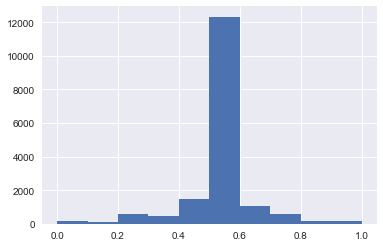

In [471]:
plt.hist(rightwing.title_polarity);

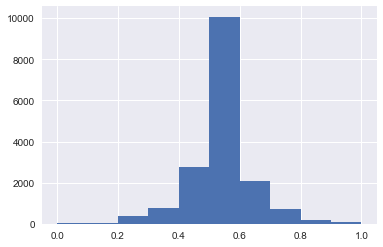

In [472]:
plt.hist(rightwing.desc_polarity);

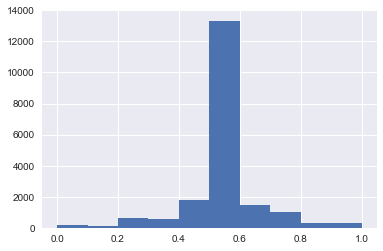

In [474]:
plt.hist(notrightwing.title_polarity);

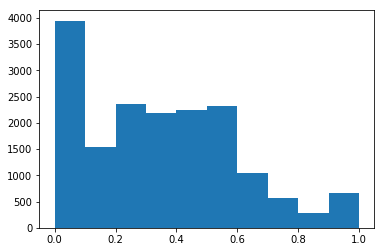

In [82]:
plt.hist(rightwing.subjectivity);

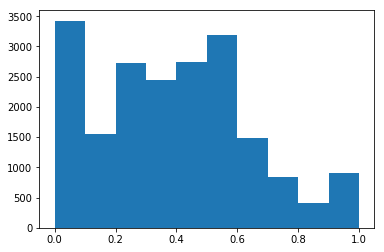

In [83]:
plt.hist(notrightwing.subjectivity);

In [475]:
rightwing.describe()

,title_polarity,title_subjectivity,desc_polarity,desc_subjectivity,subj_difference,polarity_difference,avg_word_len_title,CC_title,CD_title,DT_title,...,VBD_desc,VBG_desc,VBN_desc,VBP_desc,VBZ_desc,WDT_desc,WP_desc,WP$_desc,WRB_desc,yes_right
count,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,...,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.000000,17148.0
mean,0.507856,0.201348,0.524758,0.312783,0.444283,0.517420,0.299787,0.008506,0.023112,0.038358,...,0.034516,0.024966,0.021060,0.014968,0.029779,0.002984,0.003853,0.000145,0.002950,1.0
std,0.113371,0.296501,0.107297,0.270642,0.180273,0.070813,0.065313,0.032609,0.064290,0.070854,...,0.039476,0.033346,0.031546,0.029062,0.038474,0.010438,0.012933,0.002253,0.012852,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.500000,0.000000,0.500000,0.000000,0.325000,0.488722,0.257143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.500000,0.000000,0.500000,0.300000,0.478975,0.526316,0.294643,0.000000,0.000000,0.000000,...,0.027027,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.500000,0.400000,0.568182,0.500000,0.500000,0.539474,0.337662,0.000000,0.000000,0.071429,...,0.058824,0.043478,0.037037,0.024390,0.048780,0.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.714286,0.500000,1.000000,0.500000,...,0.500000,0.333333,0.333333,0.400000,0.333333,0.142857,0.200000,0.071429,0.333333,1.0


In [476]:
notrightwing.describe()

,title_polarity,title_subjectivity,desc_polarity,desc_subjectivity,subj_difference,polarity_difference,avg_word_len_title,CC_title,CD_title,DT_title,...,VBD_desc,VBG_desc,VBN_desc,VBP_desc,VBZ_desc,WDT_desc,WP_desc,WP$_desc,WRB_desc,yes_right
count,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,...,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.000000,19706.0
mean,0.520245,0.252814,0.535423,0.332736,0.460039,0.518327,0.279079,0.010136,0.029674,0.051855,...,0.036158,0.024587,0.018583,0.019808,0.034374,0.002960,0.004972,0.000087,0.004557,0.0
std,0.124798,0.315929,0.117463,0.284196,0.200754,0.083516,0.062686,0.029995,0.092711,0.069232,...,0.045117,0.035878,0.032798,0.037880,0.041952,0.011413,0.017275,0.001962,0.016761,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.057143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.500000,0.000000,0.500000,0.000000,0.325000,0.479825,0.238095,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.500000,0.050000,0.500000,0.316369,0.479167,0.526316,0.274725,0.000000,0.000000,0.000000,...,0.024390,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.550000,0.487500,0.587500,0.500000,0.555556,0.552632,0.317460,0.000000,0.000000,0.100000,...,0.062500,0.045455,0.033333,0.032258,0.058824,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.960526,1.000000,0.250000,1.000000,0.500000,...,0.500000,0.666667,0.500000,0.428571,0.333333,0.142857,0.500000,0.100000,0.500000,0.0


### Single Grams for Title

In [490]:
cust_stop_words = ['CNN', 'cnn',
                   'national review', 'huffpost','fox','reuters','ap', 'associated press', 'vice','breitbart',
                   'nationalreview', 'www', 'content uploads', 'msnbc', 'infowars', 'foxnews','Vice','Breitbart',
                  'National Review','Fox News','Reuters','Fast Facts','Infowars','Vice','Content Uploads','MSNBC',
                   'www', 'AP','Huffpost','HuffPost','Fox amp Friends','Morning Joe', 'Maddow', 'FOX NEWS'
                  ]
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
original_stopwords = list(ENGLISH_STOP_WORDS)
cust_stop_words += original_stopwords

In [492]:
right = text['yes_right'] == 1
notright = text['yes_right'] == 0

In [493]:
right_title = text[right].title
right_desc = text[right].description
notright_title = text[notright].title
notright_desc = text[notright].description

In [494]:
stem = PorterStemmer()
lemmatizer = WordNetLemmatizer()
cvec = CountVectorizer(preprocessor=lemmatizer.lemmatize, tokenizer=tokenizer.tokenize, 
                       ngram_range=(1,1), stop_words=cust_stop_words, min_df=10)

In [495]:
cvec.fit(right_title)
rt_counts = pd.DataFrame(cvec.transform(right_title).todense(),
                       columns=cvec.get_feature_names())
title_counts = rt_counts.sum(axis=0)
title_counts = pd.DataFrame(title_counts.sort_values(ascending = False), columns=['right'])

In [496]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(1,1), stop_words=cust_stop_words, min_df=10)
cvec.fit(notright_title)
nrt_counts = pd.DataFrame(cvec.transform(notright_title).todense(),
                         columns=cvec.get_feature_names())
nrt_counts = nrt_counts.sum(axis=0)
title_counts['not right'] = nrt_counts

In [497]:
title_counts.head(20)

,right,not right
Trump,2979,NaN
s,2862,NaN
The,1101,NaN
Is,643,NaN
t,568,NaN
North,521,NaN
Korea,502,NaN
Kim,397,NaN
House,397,NaN
U,379,NaN


In [498]:
title_counts.sort_values('not right', ascending=False).head(20)

,right,not right
new,129,1074.0
says,307,492.0
2018,220,430.0
house,21,425.0
white,16,348.0
world,21,340.0
18,81,339.0
just,15,326.0
like,31,320.0
video,73,299.0


### Single Grams for Description

In [211]:
cvec = CountVectorizer(preprocessor=lemmatizer.lemmatize, tokenizer=tokenizer.tokenize,
                       ngram_range=(1,1), stop_words='english', min_df=10)
cvec.fit(right_desc)
rd_counts = pd.DataFrame(cvec.transform(right_desc).todense(),
                         columns=cvec.get_feature_names())
desc_counts = rd_counts.sum(axis=0)
desc_counts = pd.DataFrame(desc_counts.sort_values(ascending = False), columns=['right'])

In [146]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(1,1), stop_words='english', min_df=10)
cvec.fit(notright_desc)
nrd_counts = pd.DataFrame(cvec.transform(notright_desc).todense(),
                         columns=cvec.get_feature_names())
nrd_counts = nrd_counts.sum(axis=0)
desc_counts['not right'] = nrd_counts

In [147]:
desc_counts.head(20)

,right,not right
trump,3830,4756.0
president,3215,2796.0
news,3121,857.0
fox,2794,180.0
new,1480,2052.0
house,1214,1033.0
said,1205,1093.0
donald,1111,1374.0
north,938,721.0
state,909,527.0


In [148]:
desc_counts.sort_values('not right', ascending=False).head(20)

,right,not right
trump,3830,4756.0
president,3215,2796.0
new,1480,2052.0
donald,1111,1374.0
said,1205,1093.0
house,1214,1033.0
cnn,192,958.0
news,3121,857.0
says,843,838.0
people,632,830.0


### BiGrams for Title

In [149]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(2,2), stop_words='english', min_df=10)
cvec.fit(right_title)
rt_counts2 = pd.DataFrame(cvec.transform(right_title).todense(),
                         columns=cvec.get_feature_names())
title_counts2 = rt_counts2.sum(axis=0)
title_counts2 = pd.DataFrame(title_counts2.sort_values(ascending = False), columns=['right'])

In [150]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(2,2), stop_words='english', min_df=10)
cvec.fit(notright_title)
nrt_counts2 = pd.DataFrame(cvec.transform(notright_desc).todense(),
                         columns=cvec.get_feature_names())
nrt_counts2 = nrt_counts2.sum(axis=0)
title_counts2['not right'] = nrt_counts2

In [151]:
title_counts2.head(15)

,right,not right
fox new,961,NaN
north korea,417,386.0
donald trump,303,1352.0
kim jong,182,414.0
white house,181,634.0
president trump,181,904.0
ig report,141,7.0
supreme court,129,94.0
trump kim,121,61.0
judicial activism,104,NaN


In [152]:
title_counts2.sort_values('not right', ascending=False).head(15)

,right,not right
donald trump,303,1352.0
president trump,181,904.0
white house,181,634.0
new york,100,420.0
kim jong,182,414.0
michael cohen,25,405.0
trump administration,67,400.0
north korea,417,386.0
north korean,54,254.0
special counsel,28,236.0


### BiGrams for Description

In [153]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(2,2), stop_words='english', min_df=10)
cvec.fit(right_desc)
rd_counts2 = pd.DataFrame(cvec.transform(right_desc).todense(),
                         columns=cvec.get_feature_names())
desc_counts2 = rd_counts2.sum(axis=0)
desc_counts2 = pd.DataFrame(desc_counts2.sort_values(ascending = False), columns=['right'])

In [154]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(2,2), stop_words='english', min_df=10)
cvec.fit(notright_desc)
nrd_counts2 = pd.DataFrame(cvec.transform(notright_desc).todense(),
                         columns=cvec.get_feature_names())
nrd_counts2 = nrd_counts2.sum(axis=0)
desc_counts2['not right'] = nrd_counts2

In [155]:
desc_counts2.head(15)

,right,not right
fox news,2463,101.0
president trump,1187,904.0
donald trump,1088,1352.0
president donald,932,673.0
white house,621,634.0
new york,481,420.0
kim jong,474,414.0
north korea,473,386.0
year old,339,201.0
united states,314,223.0


In [156]:
desc_counts2.sort_values('not right',ascending=False).head(15)

,right,not right
donald trump,1088,1352.0
president trump,1187,904.0
president donald,932,673.0
white house,621,634.0
new york,481,420.0
kim jong,474,414.0
michael cohen,45,405.0
trump administration,257,400.0
north korea,473,386.0
north korean,313,254.0


### TriGrams for Title

In [157]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(3,3), stop_words='english', min_df=5)
cvec.fit(right_title)
rt_counts3 = pd.DataFrame(cvec.transform(right_title).todense(),
                         columns=cvec.get_feature_names())
title_counts3 = rt_counts3.sum(axis=0)
title_counts3 = pd.DataFrame(title_counts3.sort_values(ascending = False), columns=['right'])

In [158]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(3,3), stop_words='english', min_df=5)
cvec.fit(notright_title)
nrt_counts3 = pd.DataFrame(cvec.transform(notright_desc).todense(),
                         columns=cvec.get_feature_names())
nrt_counts3 = nrt_counts3.sum(axis=0)
title_counts3['not right'] = nrt_counts3

In [159]:
title_counts3.head(15)

,right,not right
liberal judicial activism,104,NaN
day liberal judicial,104,NaN
north korea summit,76,38.0
trump kim summit,66,8.0
say fox new,53,NaN
says fox new,37,NaN
police say fox,34,NaN
report fox new,29,NaN
fox news rundown,27,NaN
south china sea,26,13.0


In [160]:
title_counts3.sort_values('not right', ascending=False).head(15)

,right,not right
new york times,23,155.0
new york city,7,60.0
trump legal team,5,48.0
summit north korea,5,42.0
trump kim jong,23,41.0
trump white house,8,41.0
fe high school,7,39.0
santa fe high,9,38.0
north korea summit,76,38.0
donald trump jr,14,34.0


### TriGrams for Description

In [161]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(3,3), stop_words='english', min_df=5)
cvec.fit(right_desc)
rd_counts3 = pd.DataFrame(cvec.transform(right_desc).todense(),
                         columns=cvec.get_feature_names())
desc_counts3 = rd_counts3.sum(axis=0)
desc_counts3 = pd.DataFrame(desc_counts3.sort_values(ascending = False), columns=['right'])

In [162]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(3,3), stop_words='english', min_df=5)
cvec.fit(notright_desc)
nrd_counts3 = pd.DataFrame(cvec.transform(notright_desc).todense(),
                         columns=cvec.get_feature_names())
nrd_counts3 = nrd_counts3.sum(axis=0)
desc_counts3['not right'] = nrd_counts3

In [163]:
desc_counts3.head(15)

,right,not right
president donald trump,926,672.0
nationalreview com wp,238,NaN
com www nationalreview,238,NaN
wp com www,238,NaN
com wp content,238,NaN
wp content uploads,238,NaN
www nationalreview com,238,NaN
content uploads 2018,233,NaN
jpg fit 1024,218,NaN
1024 2c597 ssl,216,NaN


In [164]:
desc_counts3.sort_values('not right',ascending=False).head(15)

,right,not right
president donald trump,926,672.0
north korean leader,102,158.0
new york times,118,155.0
leader kim jong,108,149.0
korean leader kim,91,133.0
special counsel robert,110,125.0
counsel robert mueller,108,122.0
fbi director james,60,81.0
director james comey,59,81.0
lawyer michael cohen,15,69.0


### QuadGrams for Title

In [165]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(4,4), stop_words='english', min_df=3)
cvec.fit(right_title)
rt_counts4 = pd.DataFrame(cvec.transform(right_title).todense(),
                         columns=cvec.get_feature_names())
title_counts4 = rt_counts4.sum(axis=0)
title_counts4 = pd.DataFrame(title_counts4.sort_values(ascending = False), columns=['right'])

In [166]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(4,4), stop_words='english', min_df=3)
cvec.fit(notright_title)
nrt_counts4 = pd.DataFrame(cvec.transform(notright_desc).todense(),
                         columns=cvec.get_feature_names())
nrt_counts4 = nrt_counts4.sum(axis=0)
title_counts4['not right'] = nrt_counts4

In [167]:
title_counts4.head(15)

,right,not right
day liberal judicial activism,104,NaN
police say fox new,34,NaN
liberal judicial activism june,22,NaN
liberal judicial activism march,20,NaN
liberal judicial activism february,19,NaN
liberal judicial activism april,19,NaN
report says fox new,13,NaN
things caught eye today,11,NaN
national review summer internship,9,NaN
fashion notes melania trump,9,NaN


In [168]:
title_counts4.sort_values('not right', ascending=False).head(15)

,right,not right
santa fe high school,7,38.0
new york attorney general,6,18.0
white house correspondents dinner,5,12.0
attorney general eric schneiderman,3,7.0
summit north korea kim,3,7.0
trump meeting kim jong,6,3.0
dhs secretary kirstjen nielsen,3,3.0
elon musk boring company,4,1.0
designer kate spade dead,4,1.0
waffle house shooting suspect,3,1.0


### QuadGrams for Description

In [169]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(4,4), stop_words=cust_stop_words, min_df=5)
cvec.fit(right_desc)
rd_counts4 = pd.DataFrame(cvec.transform(right_desc).todense(),
                         columns=cvec.get_feature_names())
desc_counts4 = rd_counts4.sum(axis=0)
desc_counts4 = pd.DataFrame(desc_counts4.sort_values(ascending = False), columns=['right'])

In [170]:
cvec = CountVectorizer(preprocessor=stem.stem, ngram_range=(4,4), stop_words=cust_stop_words, min_df=5)
cvec.fit(notright_desc)
nrd_counts4 = pd.DataFrame(cvec.transform(notright_desc).todense(),
                         columns=cvec.get_feature_names())
nrd_counts4 = nrd_counts4.sum(axis=0)
desc_counts4['not right'] = nrd_counts4

In [171]:
desc_counts4.head(15)

,right,not right
com wp content uploads,238,NaN
wp com com wp,238,NaN
com com wp content,238,NaN
wp content uploads 2018,233,NaN
fit 1024 2c597 ssl,216,NaN
jpg fit 1024 2c597,209,NaN
dictator kim jong un,125,21.0
leader kim jong un,108,148.0
special counsel robert mueller,108,122.0
north korean dictator kim,94,17.0


In [172]:
desc_counts4.sort_values('not right', ascending=False).head(15)

,right,not right
leader kim jong un,108,148.0
north korean leader kim,91,133.0
korean leader kim jong,90,132.0
special counsel robert mueller,108,122.0
fbi director james comey,59,81.0
attorney general jeff sessions,48,63.0
former fbi director james,46,62.0
white house press secretary,69,47.0
secretary state mike pompeo,53,47.0
trump north korean leader,26,45.0


### Entire Set

# Modeling

In [507]:
text = pd.read_csv('./text2.csv').drop('Unnamed: 0', axis=1)
df = pd.read_csv('./df2.csv').drop('Unnamed: 0', axis=1)

In [535]:
cust_stop_words = ['CNN', 'cnn', 'NR',
                   'national review', 'huffpost','fox','reuters','ap', 'associated press', 'vice','breitbart',
                   'nationalreview', 'www', 'content uploads', 'msnbc', 'infowars', 'foxnews','Vice','Breitbart',
                  'National Review','Fox News','Reuters','Fast Facts','Infowars','Vice','Content Uploads','MSNBC',
                   'www', 'AP','Huffpost','HuffPost','Fox amp Friends','Morning Joe', 'Maddow', 'FOX NEWS'
                  ]
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
original_stopwords = list(ENGLISH_STOP_WORDS)
cust_stop_words += original_stopwords

In [509]:
# For text data only
X = text['combined']
y = text['yes_right']

In [510]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Simple CountVec

In [536]:
cvec = CountVectorizer(preprocessor=lemmatizer.lemmatize,
#                        tokenizer=tokenizer.tokenize,
                       strip_accents='ascii',
                       ngram_range=(2,4),
                       stop_words=cust_stop_words,
                       min_df=5)

In [537]:
cvec.fit(X_train, y_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(2, 4),
        preprocessor=<bound method WordNetLemmatizer.lemmatize of <WordNetLemmatizer>>,
        stop_words=['CNN', 'cnn', 'NR', 'national review', 'huffpost', 'fox', 'reuters', 'ap', 'associated press', 'vice', 'breitbart', 'nationalreview', 'www', 'content uploads', 'msnbc', 'infowars', 'foxnews', 'Vice', 'Breitbart', 'National Review', 'Fox News', 'Reuters', 'Fast Facts', 'Infowars', 'Vice',...', 'between', 'toward', 'who', 'her', 'noone', 'beyond', 'eg', 'yours', 'front', 'myself', 'beside'],
        strip_accents='ascii', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [538]:
X_feats = pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())

In [539]:
word_counts = X_feats.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

Donald Trump              2199
President Trump           1795
White House               1292
North Korea               1220
President Donald          1220
President Donald Trump    1216
Kim Jong                   946
New York                   803
Jong Un                    758
Kim Jong Un                756
Trump administration       524
Michael Cohen              512
North Korean               493
year old                   479
United States              434
Supreme Court              403
Stormy Daniels             324
Robert Mueller             316
World Cup                  275
Rudy Giuliani              262
dtype: int64

In [540]:
cv_train = cvec.transform(X_train).todense()
cv_test = cvec.transform(X_test).todense()

In [541]:
lr = LogisticRegression(random_state=42)
lr.fit(cv_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [542]:
lr.score(cv_train, y_train)

0.85502894356005787

In [543]:
lr.score(cv_test, y_test)

0.73485999565878013

In [544]:
print(classification_report(y_test, lr.predict(cv_test)))

             precision    recall  f1-score   support

          0       0.72      0.83      0.77      4927
          1       0.76      0.62      0.69      4287

avg / total       0.74      0.73      0.73      9214



In [545]:
print(confusion_matrix(y_test, lr.predict(cv_test)))

[[4108  819]
 [1624 2663]]


In [532]:
cross_val_score(lr, cv_test, y_test, cv=7, scoring='accuracy').mean()

0.76828938361734167

In [546]:
cfs = lr.coef_[0]
fts = cvec.get_feature_names()

In [547]:
pd.DataFrame(
    list(zip(fts, np.abs(cfs), cfs)),
    columns=['feat','abs','coef']).sort_values('abs',ascending=False).head(25)

,feat,abs,coef
8273,We speak,2.772455,-2.772455
5504,Raw video,2.614837,2.614837
485,Ali Velshi,2.586766,-2.586766
8610,Your World,2.576522,2.576522
6597,TEL AVIV,2.547240,2.547240
12552,talks Rachel,2.407425,-2.407425
8153,Visit post,2.397209,2.397209
6444,Stephanie Ruhle,2.392614,-2.392614
4740,News News,2.308490,2.308490
5487,Rachel reports,2.206523,-2.206523


**Passive Aggressive Classifier** on Same CountVectorized data:

In [551]:
pac = PassiveAggressiveClassifier(C=0.5, random_state=42)

In [552]:
pac.fit(cv_train, y_train)
pac.score(cv_train, y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.84153400868306805

In [553]:
pac.score(cv_test, y_test)

0.71847189060125893

### TfIdf

In [554]:
stemmer=PorterStemmer()

In [564]:
tf = TfidfVectorizer(
    strip_accents='ascii',
    preprocessor=lemmatizer.lemmatize,
    ngram_range=(2,4),
    stop_words=cust_stop_words
)

In [565]:
tf.fit(X_train, y_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 4), norm='l2',
        preprocessor=<bound method WordNetLemmatizer.lemmatize of <WordNetLemmatizer>>,
        smooth_idf=True,
        stop_words=['CNN', 'cnn', 'NR', 'national review', 'huffpost', 'fox', 'reuters', 'ap', 'associated press', 'vice', 'breitbart', 'nationalreview', 'www', 'content uploads', 'msnbc', 'infowars', 'foxnews', 'Vice', 'Breitbart', 'National Review', 'Fox News', 'Reuters', 'Fast Facts', 'Infowars', 'Vice',...', 'between', 'toward', 'who', 'her', 'noone', 'beyond', 'eg', 'yours', 'front', 'myself', 'beside'],
        strip_accents='ascii', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [566]:
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

In [567]:
lr = LogisticRegression(random_state=42)

In [568]:
parameters = {
    'penalty': ['l2','l1'],
    'C': [1.0,0.6]
}

grid = GridSearchCV(lr, parameters, scoring='accuracy')

In [569]:
grid.fit(tf_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1'], 'C': [1.0, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [570]:
grid.score(tf_train, y_train)

0.99692474674384945

In [571]:
grid.score(tf_test, y_test)

0.73876709355328851

In [572]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [573]:
print(classification_report(y_test, grid.predict(tf_test)))

             precision    recall  f1-score   support

          0       0.71      0.87      0.78      4927
          1       0.80      0.59      0.68      4287

avg / total       0.75      0.74      0.73      9214



In [574]:
print(confusion_matrix(y_test, grid.predict(tf_test)))

[[4284  643]
 [1764 2523]]


*Gettin passive aggressive with it now*

In [575]:
pac = PassiveAggressiveClassifier(random_state=42)
pac.fit(tf_train, y_train)
pac.score(tf_train, y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


1.0

In [576]:
pac.score(tf_test, y_test)

0.77903190796613853

#### Look at Numerical Features Only

In [577]:
X = df[[col for col in df.columns if col != 'yes_right']]
y = df['yes_right']

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [579]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.74232995658465994, 0.60169307575428699)

In [580]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_train, y_train)

(0.6296671490593343, 0.6296671490593343)

In [581]:
pipe = Pipeline([
#     ('poly', PolynomialFeatures(interaction_only=True)),
#     ('pca', PCA()),
    ('model', LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [582]:
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.6296671490593343, 0.63338398089863257)

In [584]:
pd.DataFrame(list(zip(list(pipe.steps[0][1].coef_[0]), np.abs(list(pipe.steps[0][1].coef_[0])), X.columns)),
             columns=['coef','coef_abs','feat']).sort_values('coef_abs', ascending=False).head(15)

,coef,coef_abs,feat
24,-3.542671,3.542671,PRP$_title
55,3.161655,3.161655,NNPS_desc
42,-3.045602,3.045602,CC_desc
6,2.939313,2.939313,avg_word_len_title
43,2.722251,2.722251,CD_desc
59,-2.410286,2.410286,PRP_desc
60,-2.396420,2.396420,PRP$_desc
71,1.986782,1.986782,VBN_desc
77,-1.864823,1.864823,WRB_desc
44,-1.799065,1.799065,DT_desc


-----------------------------------------------

In [585]:
# text.to_csv('text.csv')
# df.to_csv('df.csv')

# Pipe

In [590]:
# For Pipeline:
X = pd.concat([text['combined'], df[[col for col in df.columns if col != 'yes_right']]], axis=1)
y = df['yes_right']
num_cols = [col for col in X.columns if col != 'combined']

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [592]:
lemmatizer = WordNetLemmatizer()
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [593]:
class DfExtract(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if len(self.column) > 1:
            return pd.DataFrame(X[self.column])
        else:
            return pd.Series(X[self.column[0]]) 
    def get_feature_names(self):
        return X.columns.tolist()

In [594]:
text_pipe = Pipeline([
            ('ext', DfExtract(['combined'])),
            ('tf', TfidfVectorizer(preprocessor=lemmatizer.lemmatize,
#                                    tokenizer=tokenizer.tokenize,
                                   stop_words=cust_stop_words, min_df=3,
                                   ngram_range=(2,4), use_idf=True, binary=False)
            ),
#             ('lda', TruncatedSVD(n_components=1000))
        ])

num_pipe = Pipeline([
            ('ext', DfExtract(num_cols)),
#             ('poly', PolynomialFeatures(interaction_only=True))
            ])

In [595]:
feat_union = FeatureUnion([
        ('text', text_pipe),
        ('numerical', num_pipe)]
#     transformer_weights={'text': 2, 'numerical': 1}
)

In [596]:
pipe = Pipeline([
    ('features', feat_union),
#     ('lda', TruncatedSVD(n_components=100)),
#     ('lr', LogisticRegression(random_state=42)),
    ('pac', PassiveAggressiveClassifier(fit_intercept=True, random_state=42))
#     ('mnb', MultinomialNB())
#     ('svc', SVC(random_state=42))
#     ('bnb', BernoulliNB(binarize=0.5))
#     ('rf', RandomForestClassifier(random_state=42))
#     ('sgdc', SGDClassifier(random_state=42))
#     ('gbc', GradientBoostingClassifier())
])

In [597]:
params = {
#     'lr__penalty': ['l1','l2'],
#     'lr__C': [0.33, 0.5, 0.75, 1.0],
#     'svc__kernel': ['rbf', 'sigmoid', 'poly'],
#     'bnb__alpha': [1.0, 0.5, 0.33]
    'pac__C': [0.35, 0.45, 0.5, 0.6, 0.75, 1],
    'pac__loss': ['hinge','squared_hinge'],
    'pac__average': [True, False]
#     'mnb__alpha': [0.001, 0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25]
#     'rf__n_estimators': [20, 30],
#     'rf__max_features': ['auto', 0.3],
#     'rf__max_depth': [None, 4, 7]
#     'sgdc__loss': ['log','perceptron'],
#     'sgdc__penalty': ['l2','elasticnet'],
#     'sgdc__alpha': [0.00001, 0.0001, 0.001]
}

gs = GridSearchCV(pipe, params, scoring='accuracy')

In [598]:
gs.fit(X_train, y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text', Pipeline(memory=None,
     steps=[('ext', DfExtract(column=['combined'])), ('tf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',...     n_jobs=1, random_state=42, shuffle=True, tol=None, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pac__C': [0.35, 0.45, 0.5, 0.6, 0.75, 1], 'pac__loss': ['hinge', 'squared_hinge'], 'pac__average': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [599]:
gs.score(X_train, y_train)

0.9129884225759769

In [600]:
gs.score(X_test, y_test)

0.76796179726503144

In [601]:
gs.best_params_

{'pac__C': 0.35, 'pac__average': True, 'pac__loss': 'hinge'}

Best scores: 
- PAC, 0.804: (1,4) ngrams, stemmer, polynomial off
- PAC, 0.842: (1,4) ngrams, lemmatizer, poly off
- LogReg, 0.808 : (1,4) ngrams, lemmatizer, poly off (and same score poly on int only)
- PAC, 0.816: (1,4) ngrams, lemmatizer, poly on int only
- PAC, 0.8399: (1,4) lemma, poly off, idf off binary false, transformer weights 3, 1
- SGDC, 0.813: (1,4) ngrams, lemmatizer, poly off, 'loss': 'perceptron', 'penalty': 'l2' -- overfit
- SGDC, 0.831: (1,4) ngrams, lemma, poly off, alpha': 0.01, 'loss': 'perceptron', 'penalty': 'l2'
- MNB: 0.824 (1,4), lemma, poly off, alpha 0.025, tfidf off, binary true
- PAC: 0.843 (1,4), lemma, poly off, C .45, binary true idf off, trans weights 2, 1
- SGDC .825, percep, l2, 0.001 alpha, tfidf off binary true

#### How well does the model work for each news source?
Make function with input source name, or for loop through `source.unique()`

In [301]:
# low, high = min(text[text['source'] == 'Breitbart'].index), max(text[text['source'] == 'Breitbart'].index)
# source_text = text[text['source'] == 'Breitbart']['combined']
# source_num = df.iloc[low:high][num_cols]
# s_label = text[text['source'] == 'Breitbart']['yes_right']
# poop = pd.concat([source_text, source_num], axis=1)
# poop = feat_union.fit_transform(poop)
# gs.score(poop, s_label)

In [300]:
# def source_score(model, source):
#     low, high = min(text[text['source'] == source].index), max(text[text['source'] == source].index)
#     source_text = text[text['source'] == source]['combined']
#     source_num = df.iloc[low:high][num_cols]
#     label = text[text['source'] == source]['yes_right']
#     X = pd.concat([source_text, source_num], axis=1)
#     X = feat_union.fit_transform(X)
#     return model.score(X, label)
    

### Getting Feature Importances

In [602]:
feature_names = text_pipe.fit(X_train, y_train).steps[1][1].get_feature_names()
feature_names.extend(num_pipe.fit(X_train, y_train).steps[0][1].get_feature_names())

In [603]:
pipe_coefs = list(gs.best_estimator_.steps[1][1].coef_[0])

In [604]:
print(len(feature_names), '=', len(pipe_coefs), '?')
print(len(feature_names)==len(pipe_coefs))

33098 = 33097 ?
False


In [605]:
feature_names[0]

'00 jpg'

In [606]:
feature_names.remove(feature_names[0])

In [607]:
print(len(feature_names), '=', len(pipe_coefs), '?')
print(len(feature_names)==len(pipe_coefs))

33097 = 33097 ?
True


In [608]:
importances = pd.DataFrame(list(zip(feature_names, pipe_coefs, np.abs(pipe_coefs))),
                          columns=['feature','coef','abs_coef'])

In [609]:
importances.sort_values('abs_coef', ascending=False).head(20)

,feature,coef,abs_coef
15254,Stephanie Ruhle Ali,-3.748326,3.748326
31581,talks Rachel Donald,-3.586563,3.586563
16151,The Latest Italy,3.449701,3.449701
1089,Ali Velshi Stephanie,-3.291323,3.291323
5378,Fast Facts Read,-2.891537,2.891537
15609,TEL AVIV An,2.885436,2.885436
1631,Ari Melber Fallback,-2.774018,2.774018
20310,Your World Generation,2.772057,2.772057
11258,News News China,2.717633,2.717633
10259,Michael Cohen 130,-2.706944,2.706944


In [272]:
import WordCloud

ModuleNotFoundError: No module named 'WordCloud'

In [610]:
# Looking at probabilities 

feat_union.fit(X_train, y_train)
X_test_transformed = feat_union.transform(X_test)

In [619]:
probabilities = gs.best_estimator_.steps[1][1].predict_proba(X_test_transformed)

AttributeError: 'PassiveAggressiveClassifier' object has no attribute 'predict_proba'

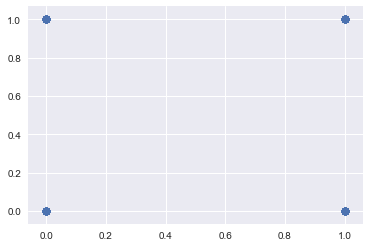

In [618]:
plt.scatter(y_test, [p[0] for p in probabilities])

In [95]:
print(classification_report(y_test, gs.predict(X_test)))

             precision    recall  f1-score   support

          0       0.78      0.90      0.84      4927
          1       0.87      0.71      0.78      4287

avg / total       0.82      0.81      0.81      9214



In [96]:
confusion_matrix(y_test, gs.predict(X_test)) # false positives

array([[4458,  469],
       [1251, 3036]])

In [261]:
# gs.best_estimator_.named_steps['features'].get_feature_names()

In [153]:
# lr_coefs = pd.DataFrame(
#     list(
#         zip(X_test.columns, np.abs(
#             coefs))), columns=['feature','coef_abs'])
# lr_coefs.sort_values('coef_abs', ascending=False, inplace=True)

----------------------------------------------------------------------------

In [34]:
# going to have to change this for feat union
def manual_test():
    title = input('Article title: \n')
    desc = input('Article description: \n')
    df = [{'title': '{}'.format(title),
                'description': '{}'.format(desc)
                }]
    df=pd.DataFrame(df)
    pred = gs.predict(df)
    if pred == 1:
        print("Result: Right wing")
    else:
        print("Result: Not right wing")

In [35]:
manual_test()

Article title: 
Wait until midterms to choose next Supreme Court justice
Article description: 
Mitch Mcconnell set a bad precedent 
Result: Not right wing


In [156]:
manual_test()

Article title: 
Democratic candidates revolt against Pelosi in House races across the country
Article description: 
Anyone looking for signs that Nancy Pelosi has lost clout within the Democratic ranks this cycle need only catch a glimpse of last week’s candidate forum in New Hampshire’s 1st Congressional District
Result: Not right wing


# RNN

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [31]:
X = text['title']
y = text['yes_right']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [33]:
tfidf = TfidfVectorizer(preprocessor=lemmatizer.lemmatize, stop_words=cust_stop_words, ngram_range=(1,4))

In [34]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train.todense())
X_test = pd.DataFrame(X_test.todense())

In [36]:
train_X = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
test_X = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [37]:
train_X.shape

(27640, 469477, 1)

In [41]:
batch_size = None
model = Sequential()
model.add(LSTM(4, 
               batch_input_shape=(batch_size, train_X.shape[1], train_X.shape[2]), 
               stateful=False))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_X, y_train, validation_data=(test_X, y_test), 
              epochs=10, batch_size=batch_size, verbose=1, shuffle=False)
model.reset_states()

Train on 27640 samples, validate on 9214 samples
Epoch 1/10
